In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle
import nxviz as nv

In [2]:
H = nx.read_gpickle('github_users.p')
type(H)

networkx.classes.graph.Graph

In [3]:
H.__dict__

{'edge': {'u54013': {},
  'u17973': {},
  'u41986': {},
  'u13403': {},
  'u47811': {},
  'u49045': {},
  'u47299': {},
  'u23234': {},
  'u16180': {},
  'u40749': {},
  'u29006': {},
  'u33086': {},
  'u45711': {},
  'u55522': {},
  'u38520': {},
  'u48368': {},
  'u18752': {},
  'u33256': {},
  'u50332': {},
  'u56330': {},
  'u4446': {'u10030': {},
   'u5170': {},
   'u7710': {},
   'u1233': {},
   'u1745': {},
   'u7327': {},
   'u5972': {},
   'u8249': {},
   'u8189': {},
   'u8145': {},
   'u298': {},
   'u2901': {},
   'u7772': {},
   'u4793': {},
   'u8612': {},
   'u8362': {}},
  'u10497': {},
  'u50840': {},
  'u35818': {},
  'u27606': {},
  'u16715': {},
  'u24475': {},
  'u1431': {'u5055': {}},
  'u903': {'u10097': {},
   'u610': {},
   'u3874': {},
   'u9656': {},
   'u9989': {},
   'u3181': {},
   'u4836': {},
   'u65': {},
   'u532': {},
   'u8343': {},
   'u2458': {}},
  'u18002': {},
  'u10466': {},
  'u29138': {},
  'u40448': {},
  'u18247': {},
  'u44356': {},
  'u54

In [4]:
G = nx.Graph()
G.add_nodes_from(H.__dict__['node'])
nx.set_node_attributes(G, H.__dict__['node'])
len(G.nodes())

56519

In [5]:
edges = [(k, k1) for k, v in H.__dict__['edge'].items() for k1, v1 in v.items() if v]
G.add_edges_from(edges)
len(G.edges())

74095

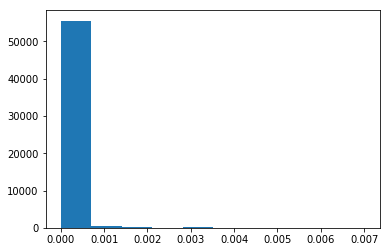

In [6]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

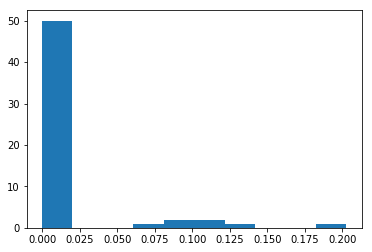

In [7]:
G_sub_nodes = ['u3135',
 'u6728',
 'u4034',
 'u6738',
 'u203',
 'u886',
 'u5578',
 'u1814',
 'u24',
 'u534',
 'u322',
 'u3441',
 'u1863',
 'u1116',
 'u9967',
 'u8657',
 'u3930',
 'u2175',
 'u3305',
 'u9044',
 'u1087',
 'u116',
 'u4498',
 'u37',
 'u3269',
 'u4063',
 'u6482',
 'u2159',
 'u6162',
 'u10020',
 'u221',
 'u3756',
 'u2846',
 'u10566',
 'u10579',
 'u2502',
 'u6794',
 'u3954',
 'u4656',
 'u366',
 'u6984',
 'u2022',
 'u4546',
 'u1773',
 'u3985',
 'u4392',
 'u45636',
 'u1627',
 'u5754',
 'u7960',
 'u9124',
 'u576',
 'u6554',
 'u2356',
 'u7629',
 'u1849',
 'u845']
G_sub = G.subgraph(G_sub_nodes)
# Plot the betweenness distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G_sub).values()))
plt.show()

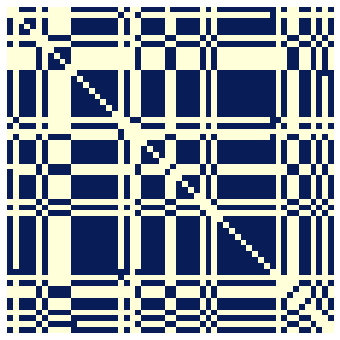

In [8]:
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G_sub), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = nv.MatrixPlot(largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

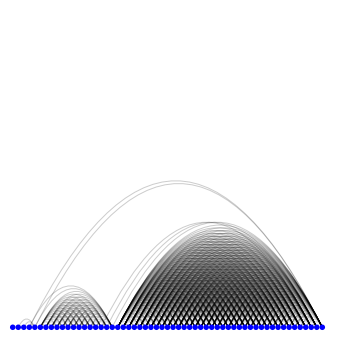

In [9]:
# Iterate over all the nodes in G, including the metadata
for n, d in G_sub.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G_sub.node[n]['degree'] = nx.degree(G_sub, n)
    
# Create the ArcPlot object: a
a = nv.ArcPlot(G_sub, node_order = 'degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

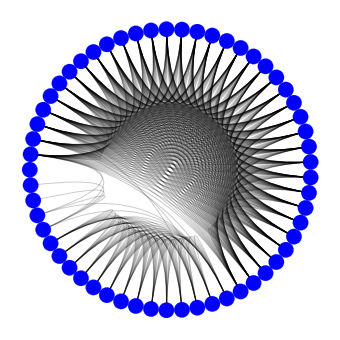

In [10]:
# Iterate over all the nodes, including the metadata
for n, d in G_sub.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G_sub.node[n]['degree'] = nx.degree(G_sub, n)

# Create the CircosPlot object: c
c = nv.CircosPlot(G_sub, node_order = 'degree')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

In [11]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G_sub)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

8


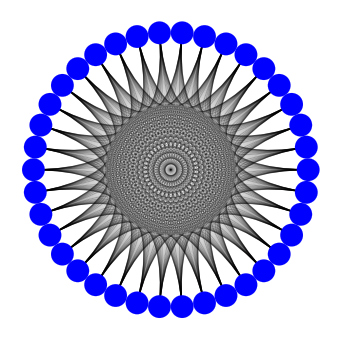

In [12]:
# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G_sub), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G_sub.subgraph(largest_clique)

# Create the CircosPlot object: c
c = nv.CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

In [13]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u89']


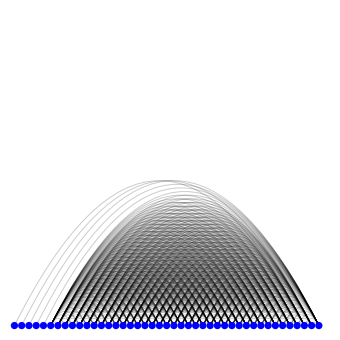

In [14]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G_sub), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G_sub.subgraph(largest_max_clique)

G_lmc2 = nx.Graph(G_lmc)


# Go out 1 degree of separation
for node in G_lmc.nodes():
    G_lmc2.add_nodes_from(G_sub.neighbors(node))
    G_lmc2.add_edges_from(zip([node]*len(list(G_sub.neighbors(node))), G_sub.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc2.nodes():
    G_lmc2.node[n]['degree centrality'] = nx.degree_centrality(G_lmc2)[n]
        
# Create the ArcPlot object: a
a = nv.ArcPlot(G_lmc2, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [15]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G_sub.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G_sub.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G_sub.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('u3305', 'u37'), ('u37', 'u2159'), ('u2159', 'u534'), ('u366', 'u322'), ('u3305', 'u366')]
